# Import libraries

In [3]:
import random
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn import linear_model
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import learning_curve
from sklearn.metrics import precision_recall_fscore_support
# import different algorithms  
from sklearn.linear_model import LogisticRegression
from sklearn.neural_network import MLPClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC
from sklearn.gaussian_process import GaussianProcessClassifier
from sklearn.gaussian_process.kernels import RBF
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier, AdaBoostClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.discriminant_analysis import QuadraticDiscriminantAnalysis


# Import data

In [4]:
df=pd.read_csv("train.csv")
df

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S
...,...,...,...,...,...,...,...,...,...,...,...,...
886,887,0,2,"Montvila, Rev. Juozas",male,27.0,0,0,211536,13.0000,NaN,S
887,888,1,1,"Graham, Miss. Margaret Edith",female,19.0,0,0,112053,30.0000,B42,S
888,889,0,3,"Johnston, Miss. Catherine Helen ""Carrie""",female,NaN,1,2,W./C. 6607,23.4500,NaN,S
889,890,1,1,"Behr, Mr. Karl Howell",male,26.0,0,0,111369,30.0000,C148,C


In [5]:
df.isna().sum()

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64

# Data description

# Data visualisation

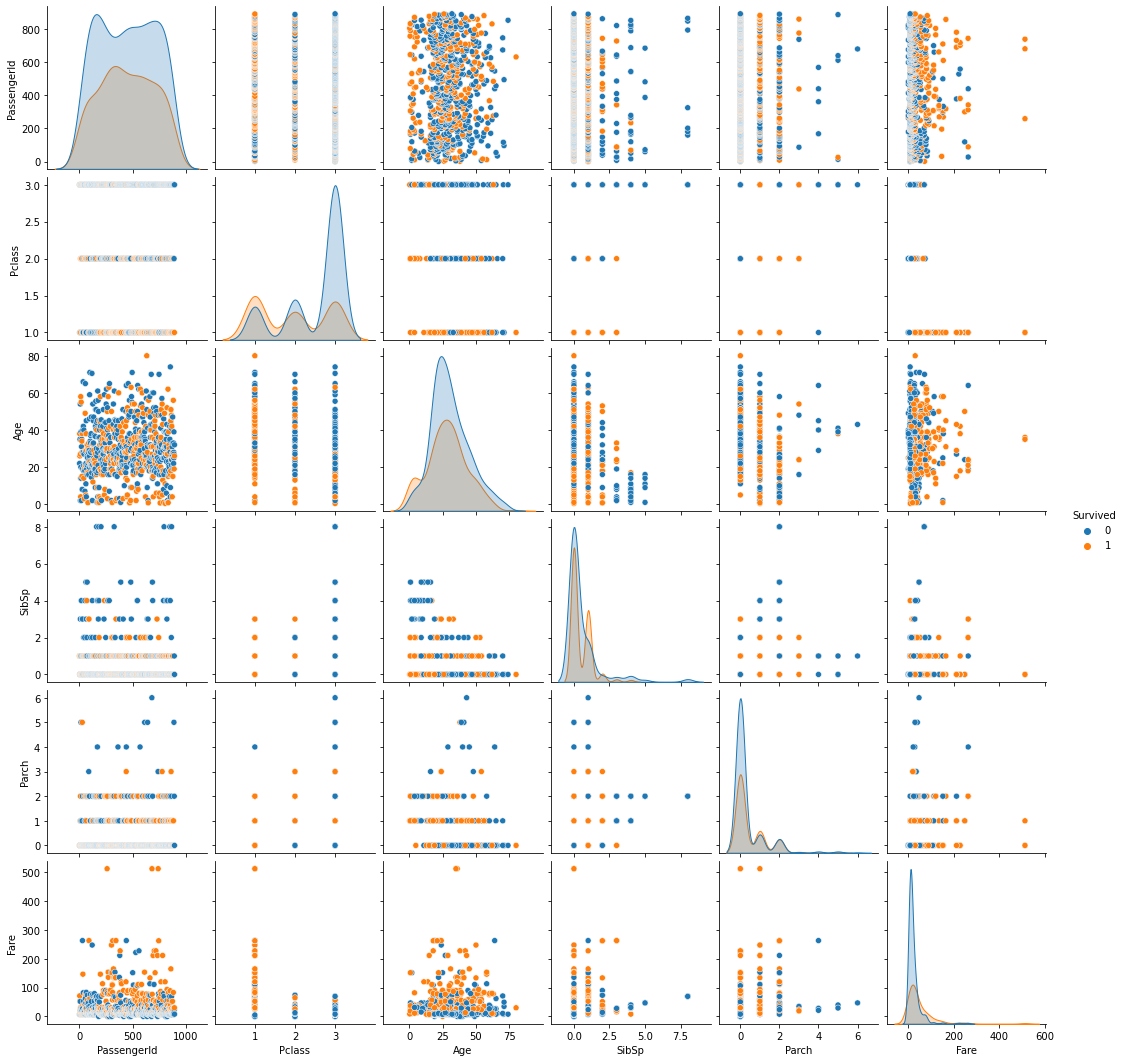

In [6]:
sns.pairplot(df,hue="Survived")

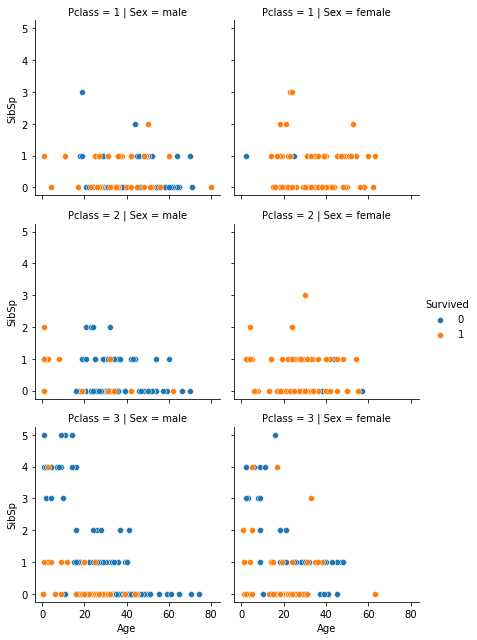

In [7]:
g = sns.FacetGrid(df, col="Sex",row="Pclass", hue="Survived")
g.map(sns.scatterplot, "Age", "SibSp")
g.add_legend()

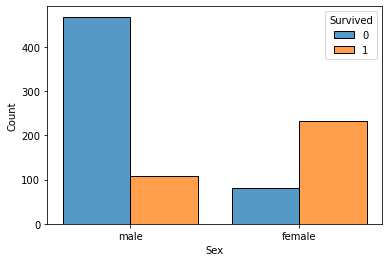

In [8]:
sns.histplot(data=df, x="Sex", hue="Survived", multiple="dodge", shrink=.8)

# Features and Label definition:


In [9]:
#label definition 
y=df.Survived
y.shape

(891,)

In [10]:
#Features definition
#
x=df.drop(["Survived","PassengerId","Ticket","Name"],axis=1)
x

,Pclass,Sex,Age,SibSp,Parch,Fare,Cabin,Embarked
0,3,male,22.0,1,0,7.2500,NaN,S
1,1,female,38.0,1,0,71.2833,C85,C
2,3,female,26.0,0,0,7.9250,NaN,S
3,1,female,35.0,1,0,53.1000,C123,S
4,3,male,35.0,0,0,8.0500,NaN,S
...,...,...,...,...,...,...,...,...
886,2,male,27.0,0,0,13.0000,NaN,S
887,1,female,19.0,0,0,30.0000,B42,S
888,3,female,NaN,1,2,23.4500,NaN,S
889,1,male,26.0,0,0,30.0000,C148,C


# Missing data

## Fill age column

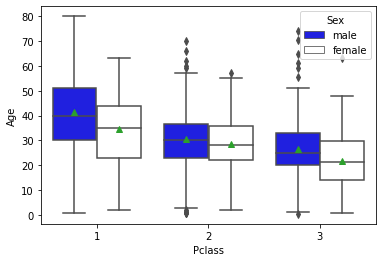

In [11]:
sns.boxplot(x="Pclass", y="Age",
            hue="Sex", palette=["b", "w"],showmeans=True,
            data=df)

In [12]:
MeanM1=round(x.loc[(x["Pclass"]==1)&(x["Sex"]=="male"),["Age"]].mean()[0])
print("The mean age of class 1 men is: ", MeanM1)
MeanM2=round(x.loc[(x["Pclass"]==2)&(x["Sex"]=="male"),["Age"]].mean()[0])
print("The mean age of class 2 men is: ", MeanM2)
MeanM3=round(x.loc[(x["Pclass"]==3)&(x["Sex"]=="male"),["Age"]].mean()[0])
print("The mean age of class 3 men is: ", MeanM3)
MeanF1=round(x.loc[(x["Pclass"]==1)&(x["Sex"]=="female"),["Age"]].mean()[0])
print("The mean age of class 1 women is: ", MeanF1)
MeanF2=round(x.loc[(x["Pclass"]==2)&(x["Sex"]=="female"),["Age"]].mean()[0])
print("The mean age of class 2 women is: ", MeanF2)
MeanF3=round(x.loc[(x["Pclass"]==3)&(x["Sex"]=="female"),["Age"]].mean()[0])
print("The mean age of class 3 women is: ", MeanF3)

The mean age of class 1 men is:  41.0
The mean age of class 2 men is:  31.0
The mean age of class 3 men is:  27.0
The mean age of class 1 women is:  35.0
The mean age of class 2 women is:  29.0
The mean age of class 3 women is:  22.0


In [13]:
x.loc[(x["Pclass"]==1)&(x["Sex"]=="female"),["Age"]]=x.loc[(x["Pclass"]==1)&(x["Sex"]=="female"),["Age"]].fillna(MeanF1)
x.loc[(x["Pclass"]==2)&(x["Sex"]=="female"),["Age"]]=x.loc[(x["Pclass"]==2)&(x["Sex"]=="female"),["Age"]].fillna(MeanF2)
x.loc[(x["Pclass"]==3)&(x["Sex"]=="female"),["Age"]]=x.loc[(x["Pclass"]==3)&(x["Sex"]=="female"),["Age"]].fillna(MeanF3)
x.loc[(x["Pclass"]==1)&(x["Sex"]=="male"),["Age"]]=x.loc[(x["Pclass"]==1)&(x["Sex"]=="male"),["Age"]].fillna(MeanM1)
x.loc[(x["Pclass"]==2)&(x["Sex"]=="male"),["Age"]]=x.loc[(x["Pclass"]==2)&(x["Sex"]=="male"),["Age"]].fillna(MeanM2)
x.loc[(x["Pclass"]==3)&(x["Sex"]=="male"),["Age"]]=x.loc[(x["Pclass"]==3)&(x["Sex"]=="male"),["Age"]].fillna(MeanM3)


## Get deck letter from cabin number and fill missing data

In [14]:
x["Cabin"]=x["Cabin"].apply(lambda x: str(x)[0] if str(x)!="nan" else x)


In [15]:
x["Cabin"].describe()


count     204
unique      8
top         C
freq       59
Name: Cabin, dtype: object

In [16]:
x.Cabin.unique()

array([nan, 'C', 'E', 'G', 'D', 'A', 'B', 'F', 'T'], dtype=object)

<img src="deck.bmp"/>

In [17]:
x.loc[x["Cabin"]=="T",["Cabin"]]=np.nan

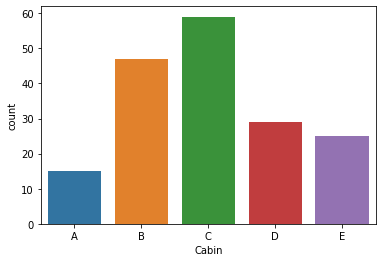

In [18]:
sns.countplot(x="Cabin", data=x[x["Pclass"]==1].sort_values(["Cabin"]))

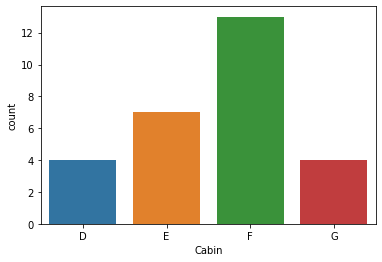

In [19]:
sns.countplot(x="Cabin", data=x[x["Pclass"]!=1].sort_values(["Cabin"]))

In [20]:
x.loc[x["Pclass"]==1,["Cabin"]]=x.loc[x["Pclass"]==1,["Cabin"]].fillna(x[x["Pclass"]==1]["Cabin"].describe().top)
x.loc[x["Pclass"]!=1,["Cabin"]]=x.loc[x["Pclass"]!=1,["Cabin"]].fillna(x[x["Pclass"]!=1]["Cabin"].describe().top)

## fill missing Embarked data

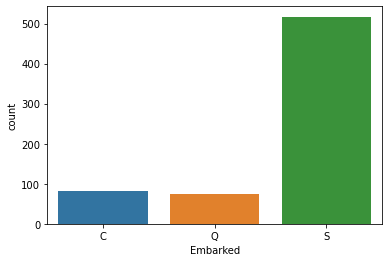

In [21]:
sns.countplot(x="Embarked", data=x[x["Pclass"]!=1].sort_values(["Embarked"]))

In [22]:
x["Embarked"].fillna("S",inplace=True)

In [23]:
x.isna().sum()

Pclass      0
Sex         0
Age         0
SibSp       0
Parch       0
Fare        0
Cabin       0
Embarked    0
dtype: int64

# Get category features from non-hierarchical data

In [24]:
x=pd.get_dummies(x,columns=["Sex","Embarked"])
x

,Pclass,Age,SibSp,Parch,Fare,Cabin,Sex_female,Sex_male,Embarked_C,Embarked_Q,Embarked_S
0,3,22.0,1,0,7.2500,F,0,1,0,0,1
1,1,38.0,1,0,71.2833,C,1,0,1,0,0
2,3,26.0,0,0,7.9250,F,1,0,0,0,1
3,1,35.0,1,0,53.1000,C,1,0,0,0,1
4,3,35.0,0,0,8.0500,F,0,1,0,0,1
...,...,...,...,...,...,...,...,...,...,...,...
886,2,27.0,0,0,13.0000,F,0,1,0,0,1
887,1,19.0,0,0,30.0000,B,1,0,0,0,1
888,3,22.0,1,2,23.4500,F,1,0,0,0,1
889,1,26.0,0,0,30.0000,C,0,1,1,0,0


# Translate deck letters to integers

In [25]:
mapping={"A":1,"B":2,"C":3,"D":4,"E":5,"F":6,"G":7}
x=x.replace({ 'Cabin':mapping})

In [26]:
x

,Pclass,Age,SibSp,Parch,Fare,Cabin,Sex_female,Sex_male,Embarked_C,Embarked_Q,Embarked_S
0,3,22.0,1,0,7.2500,6,0,1,0,0,1
1,1,38.0,1,0,71.2833,3,1,0,1,0,0
2,3,26.0,0,0,7.9250,6,1,0,0,0,1
3,1,35.0,1,0,53.1000,3,1,0,0,0,1
4,3,35.0,0,0,8.0500,6,0,1,0,0,1
...,...,...,...,...,...,...,...,...,...,...,...
886,2,27.0,0,0,13.0000,6,0,1,0,0,1
887,1,19.0,0,0,30.0000,2,1,0,0,0,1
888,3,22.0,1,2,23.4500,6,1,0,0,0,1
889,1,26.0,0,0,30.0000,3,0,1,1,0,0


# Logistic regression model training

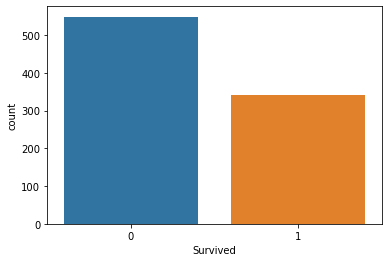

In [27]:
sns.countplot(x="Survived", data=pd.DataFrame(y))

In [28]:
100*y.sum()/y.size

38.38383838383838

Our data set has less true (y=1) than false (y=0) label values. we should use the stratify parameter in the train test split:

In [29]:
rand=random.seed(42)
x_train, x_test,y_train, y_test =train_test_split(x, y, test_size=0.2,stratify=y,random_state=rand)




In [30]:
print(round(100*y_train.sum()/y_train.size,2),"% of the train set has 1 label")

38.34 % of the train set has 1 label


In [31]:
print(round(100*y_test.sum()/y_test.size,2),"% of the test set has 1 label")

38.55 % of the test set has 1 label


In [32]:
#scaler instantiation and x_train and x_test scale and normalisation
scaler = StandardScaler()
x_train = scaler.fit_transform(x_train)
x_test = scaler.transform(x_test)
#Logistic regression model instentiation
Model=LogisticRegression()
#logistic regression model trained on the traindata set
Model.fit(x_train,y_train)

LogisticRegression()

In [33]:
print("The logistic regression model had ",round(100*Model.score(x_train,y_train),2),"% of accuracy on the train set")

The logistic regression model had  81.46 % of accuracy on the train set


In [34]:
print("The logistic regression model had ",round(100*Model.score(x_test,y_test),2),"% of accuracy on the test set")

The logistic regression model had  80.45 % of accuracy on the test set


In [35]:
precision=round(100*precision_recall_fscore_support(y_test,Model.predict(x_test),labels=[1])[0][0],2)
recall=round(100*precision_recall_fscore_support(y_test,Model.predict(x_test),labels=[1])[1][0],2)
f1score=round(100*precision_recall_fscore_support(y_test,Model.predict(x_test),labels=[1])[2][0],2)
print("The precision of the logistic regression model is: ",precision,"%")
print("The recall of the logistic regression model is: ",recall,"%")
print("The f1score of the logistic regression model is: ",f1score,"%")

The precision of the logistic regression model is:  80.36 %
The recall of the logistic regression model is:  65.22 %
The f1score of the logistic regression model is:  72.0 %


In [49]:
def Plot_learninCurve(Model,X,y):
    

    # Ploting Learning Curve
    # Creating CV training and test scores for various training set sizes
    train_sizes, train_scores, test_scores = learning_curve(Model,
                                               X, y, cv=10, scoring='accuracy', n_jobs=-1,
                                               # 50 different sizes of the training set
                                               train_sizes=np.linspace(0.01, 1.0, 50))

    # Creating means and standard deviations of training set scores
    train_mean = np.mean(train_scores, axis=1)
    train_std = np.std(train_scores, axis=1)

    # Creating means and standard deviations of test set scores
    test_mean = np.mean(test_scores, axis=1)
    test_std = np.std(test_scores, axis=1)

    # Drawing lines
    plt.subplots(1, figsize=(10,10))
    plt.plot(train_sizes, train_mean, '--', color="blue",  label="Training score")
    plt.plot(train_sizes, test_mean, color="red", label="Cross-validation score")

    # Drawing bands
    plt.fill_between(train_sizes, train_mean - train_std, train_mean + train_std, color='gray', alpha=0.2)
    plt.fill_between(train_sizes, test_mean - test_std, test_mean + test_std, color='gray', alpha=0.2)

    # Creating plot
    plt.title("Learning Curve")
    plt.xlabel("Training Set Size"), plt.ylabel("Accuracy Score"), plt.legend(loc="best")
    plt.tight_layout(); plt.show()

    



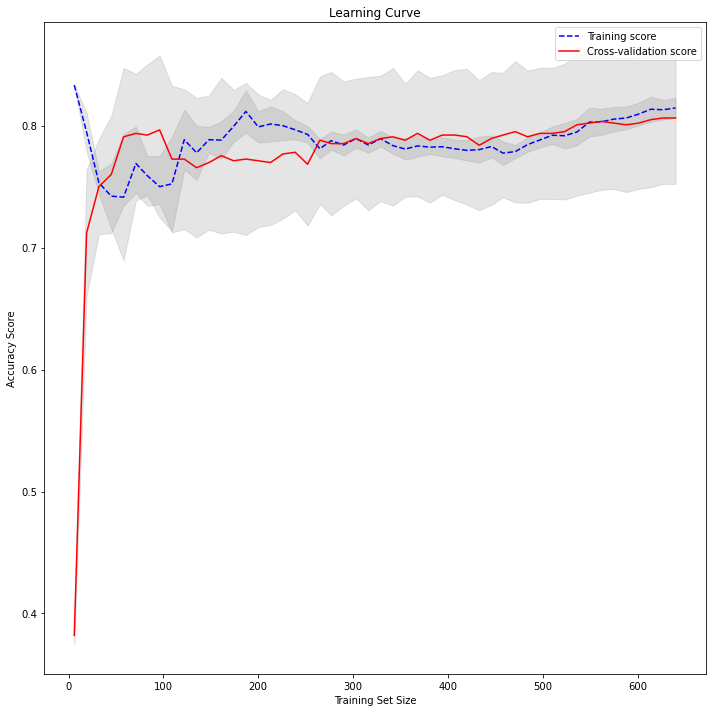

In [52]:
Plot_learninCurve(LogisticRegression(),x_train,y_train)

The learning curves shows fast converge of the model but we have a large variance of the final accuracy represented by the gray band on the plots.
The final accuracy depends on the training set selected before the learning. 

# Classifier comparaison:

In this section, we will compare the performances of ten different classifiers:
    Logistic Regression()
    KNeighborsClassifier(3)
    SVC(kernel="linear", C=0.025)
    GaussianProcessClassifier(1.0 * RBF(1.0))
    DecisionTreeClassifier(max_depth=5)
    RandomForestClassifier(max_depth=5, n_estimators=10, max_features=1)
    MLPClassifier(alpha=1, max_iter=1000)
    AdaBoostClassifier()
    GaussianNB()
    QuadraticDiscriminantAnalysis()

In [53]:
def evaluate_model(model,x_train,y_train,x_test,y_test):
    clf=model
    clf.fit(x_train,y_train)
    train_accuracy=round(100*clf.score(x_train,y_train),2)
    test_accuracy=round(100*clf.score(x_test,y_test),2)
    precision, recall,fscore,support =precision_recall_fscore_support(y_test,clf.predict(x_test),labels=[1])
    df=pd.DataFrame({"Name":[str(model).split("(")[0]]})
    df['Train_Accuracy (%)']= train_accuracy
    df['Test_Accuracy (%)']= test_accuracy
    df['Precision (%)']= round(100*precision[0],2)
    df['Recall (%)']= round(100*recall[0],2)
    df['Fscore (%)']= round(100*fscore[0],2)
    return df

We use the evalute_model function to compare performances of the selected classifiers:
    

In [54]:
classifiers = [
    KNeighborsClassifier(3),
    SVC(kernel="linear", C=0.025),
    GaussianProcessClassifier(1.0 * RBF(1.0)),
    DecisionTreeClassifier(max_depth=5),
    RandomForestClassifier(max_depth=5, n_estimators=10, max_features=1),
    MLPClassifier(alpha=1, max_iter=1000),
    AdaBoostClassifier(),
    GaussianNB(),
    QuadraticDiscriminantAnalysis()]

In [55]:
names = ["Logistic Regrression","Nearest Neighbors", "Linear SVM", "Gaussian Process",
         "Decision Tree", "Random Forest", "Neural Net", "AdaBoost",
         "Naive Bayes", "QDA"]

In [56]:
Evaluation=evaluate_model(LogisticRegression(),x_train,y_train,x_test,y_test)
for i in classifiers:
    Evaluation=Evaluation.append(evaluate_model(i,x_train,y_train,x_test,y_test),ignore_index=True)

#The dataframe is sorted by accuracy on the test set
Evaluation.sort_values(by="Test_Accuracy (%)",ascending=False)
    

C:\Users\greew\anaconda3\lib\site-packages\sklearn\discriminant_analysis.py:715: UserWarning: Variables are collinear
  warnings.warn("Variables are collinear")


,Name,Train_Accuracy (%),Test_Accuracy (%),Precision (%),Recall (%),Fscore (%)
6,MLPClassifier,84.27,84.36,90.20,66.67,76.67
3,GaussianProcessClassifier,83.85,83.80,85.71,69.57,76.80
5,RandomForestClassifier,85.67,81.56,84.62,63.77,72.73
1,KNeighborsClassifier,87.08,81.01,83.02,63.77,72.13
0,LogisticRegression,81.46,80.45,80.36,65.22,72.00
4,DecisionTreeClassifier,85.39,79.89,75.38,71.01,73.13
7,AdaBoostClassifier,84.69,79.33,75.81,68.12,71.76
2,SVC,78.93,77.65,74.58,63.77,68.75
8,GaussianNB,79.21,76.54,71.43,65.22,68.18
9,QuadraticDiscriminantAnalysis,43.26,46.37,41.29,92.75,57.14


### Result interpretation

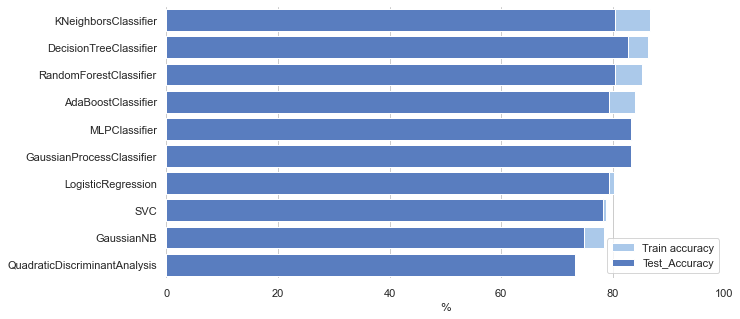

In [771]:


sns.set_theme(style="whitegrid")

# Initialize the matplotlib figure
f, ax = plt.subplots(figsize=(10, 5))
sns.set_color_codes("pastel")

# Plot the total crashes
sns.set_color_codes("pastel")
sns.barplot(x="Train_Accuracy (%)", y="Name", data=Evaluation.sort_values(by="Train_Accuracy (%)",ascending=False),
            label="Train accuracy", color="b")

# Plot the crashes where alcohol was involved
sns.set_color_codes("muted")
sns.barplot(x="Test_Accuracy (%)", y="Name", data=Evaluation.sort_values(by="Train_Accuracy (%)",ascending=False),
            label="Test_Accuracy", color="b")

ax.set(xlim=(0, 100), ylabel="",
       xlabel="%")
sns.despine(left=True, bottom=True)
ax.legend(loc=4)

MLP Classifier shows the best accuracy on the test set. the model has almost the same accuracy on the train set.
KNeighborsClassifier has better accuracy on the train set but on the test set, we have a significant drop of accuracy.

As our set has less than 40% of positive labels, it's important to consider the precission and recall of the models before to choose the best one for our purpose.
The precision is intuitively the ability of the classifier not to label as positive a sample that is negative.
The recall is intuitively the ability of the classifier to find all the positive samples.

Again, it's the MLPClassifier who gives the best performance opn the Precision. But it's less performent on the recall.
The best recall is given by QuadraticDiscriminantAnalysis, but this classifier has a very poor precision (almost the same precision can be provided with a classifier who label all the samples as positive)

The Fscore is the harminic mean of precision and recall, so we can select a balanced classifier using this score.
Random Forest classifier and MLPclassifier have the best fscore in the classifiers list.

MLP classifier seems to be a good model for our machine learning problem. it has the best accuracy on the test set, and the best precision. This classifier doens't provide the best recall but the fscore shows that it has one of the best precision/recall balance.


## Generate the CSV file for kaggle submition

Definition of a function which use a trained classifier and row dataframe to clean and tranform the data, and fill the missing inromation before to make predection on it and save the result in the appropriate form for kaggle submition.

In [58]:
def Prediction_csv(model,csv):
    #exctractPassengerId as we need it to make the final csv
    PassengerId=csv.PassengerId
    #drop usless data for the predection
    x=csv.drop(["PassengerId","Ticket","Name"],axis=1)
    #compute all the age means function of class and sex
    MeanM1=round(x.loc[(x["Pclass"]==1)&(x["Sex"]=="male"),["Age"]].mean()[0])
    MeanM2=round(x.loc[(x["Pclass"]==2)&(x["Sex"]=="male"),["Age"]].mean()[0])
    MeanM3=round(x.loc[(x["Pclass"]==3)&(x["Sex"]=="male"),["Age"]].mean()[0])
    MeanF1=round(x.loc[(x["Pclass"]==1)&(x["Sex"]=="female"),["Age"]].mean()[0])
    MeanF2=round(x.loc[(x["Pclass"]==2)&(x["Sex"]=="female"),["Age"]].mean()[0])
    MeanF3=round(x.loc[(x["Pclass"]==3)&(x["Sex"]=="female"),["Age"]].mean()[0])
    
    #fill the missing ages by the appropriate means
    x.loc[(x["Pclass"]==1)&(x["Sex"]=="female"),["Age"]]=x.loc[(x["Pclass"]==1)&(x["Sex"]=="female"),["Age"]].fillna(MeanF1)
    x.loc[(x["Pclass"]==2)&(x["Sex"]=="female"),["Age"]]=x.loc[(x["Pclass"]==2)&(x["Sex"]=="female"),["Age"]].fillna(MeanF2)
    x.loc[(x["Pclass"]==3)&(x["Sex"]=="female"),["Age"]]=x.loc[(x["Pclass"]==3)&(x["Sex"]=="female"),["Age"]].fillna(MeanF3)
    x.loc[(x["Pclass"]==1)&(x["Sex"]=="male"),["Age"]]=x.loc[(x["Pclass"]==1)&(x["Sex"]=="male"),["Age"]].fillna(MeanM1)
    x.loc[(x["Pclass"]==2)&(x["Sex"]=="male"),["Age"]]=x.loc[(x["Pclass"]==2)&(x["Sex"]=="male"),["Age"]].fillna(MeanM2)
    x.loc[(x["Pclass"]==3)&(x["Sex"]=="male"),["Age"]]=x.loc[(x["Pclass"]==3)&(x["Sex"]=="male"),["Age"]].fillna(MeanM3)
    #keep only the first letter for cabin number
    x["Cabin"]=x["Cabin"].apply(lambda x: str(x)[0] if str(x)!="nan" else x)
    #fill the missing cabin data by the most commun cabin in first class and in middle+lower class
    x.loc[x["Pclass"]==1,["Cabin"]]=x.loc[x["Pclass"]==1,["Cabin"]].fillna(x[x["Pclass"]==1]["Cabin"].describe().top)
    x.loc[x["Pclass"]!=1,["Cabin"]]=x.loc[x["Pclass"]!=1,["Cabin"]].fillna(x[x["Pclass"]!=1]["Cabin"].describe().top)
    #fill the missing embarkation data by the most commun one(S)
    x["Embarked"].fillna("S",inplace=True)
    #generate categorical features from sex and embarked data
    x=pd.get_dummies(x,columns=["Sex","Embarked"])
    #transform the deck corresponding letter to numbers
    mapping={"A":1,"B":2,"C":3,"D":4,"E":5,"F":6,"G":7}
    x=x.replace({ 'Cabin':mapping})
    #fill the missing data if there is, by 0
    x=x.fillna(0)
    #scale x
    x= scaler.fit_transform(x)
    #predict y from x
    Prediction=model.predict(x)
    #create a dataframe with the appropriate kaggle submition format using prediction and PassengerId
    df=pd.DataFrame({"PassengerId":PassengerId,"Survived":Prediction})
    #save the dataframe into a csv file
    df.to_csv(r'C:\Users\greew\Documents\Kaggle\Titanic\Prediction.csv',index=False)

Before to use the previous function for a csv submition file, we import the test data from a csv and we train the submition classifier on our training data

In [73]:
csv=pd.read_csv("test.csv")
submition_model=MLPClassifier(alpha=1, max_iter=1000)
submition_model.fit(x_train,y_train)
submition_model.score(x_test,y_test)

0.8435754189944135

In [787]:
Prediction_csv(submition_model,csv)

The mean age of class 1 men is:  41.0
The mean age of class 2 men is:  31.0
The mean age of class 3 men is:  25.0
The mean age of class 1 women is:  41.0
The mean age of class 2 women is:  24.0
The mean age of class 3 women is:  23.0
